In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv("../input/titanic/train.csv")
test=pd.read_csv("../input/titanic/test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop(["Fare"],axis=1,inplace=True)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#fill the missing cabin values with mode
df["Cabin"].fillna(str(df["Cabin"].mode().values[0]),inplace=True)

In [7]:
df["Cabin"]=df["Cabin"].apply(lambda x:str(x).replace(' ','')if ' ' in str(x) else str(x))

In [8]:
df["Deck"] = df["Cabin"].str.slice(0,1)

In [9]:
df.drop(["Cabin"],axis=1,inplace=True)

In [10]:
def impute_median(series):
    return series.fillna(series.median())

In [11]:
df.Age=df.Age.transform(impute_median)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
Deck           0
dtype: int64

In [13]:
df["Embarked"]=df["Embarked"].fillna("S")

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Deck           0
dtype: int64

In [15]:
df['Is_Married'] = np.where(df['SibSp']==1, 1, 0)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Deck,Is_Married
0,1,0,3,male,22.0,1,0,S,B,1
1,2,1,1,female,38.0,1,0,C,C,1
2,3,1,3,female,26.0,0,0,S,B,0
3,4,1,1,female,35.0,1,0,S,C,1
4,5,0,3,male,35.0,0,0,S,B,0


In [16]:
df["Family_Size"]=df.SibSp+df.Parch
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Deck,Is_Married,Family_Size
0,1,0,3,male,22.0,1,0,S,B,1,1
1,2,1,1,female,38.0,1,0,C,C,1,1
2,3,1,3,female,26.0,0,0,S,B,0,0
3,4,1,1,female,35.0,1,0,S,C,1,1
4,5,0,3,male,35.0,0,0,S,B,0,0


In [17]:
df['Elderly'] = np.where(df['Age']>=50, 1, 0)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Deck,Is_Married,Family_Size,Elderly
0,1,0,3,male,22.0,1,0,S,B,1,1,0
1,2,1,1,female,38.0,1,0,C,C,1,1,0
2,3,1,3,female,26.0,0,0,S,B,0,0,0
3,4,1,1,female,35.0,1,0,S,C,1,1,0
4,5,0,3,male,35.0,0,0,S,B,0,0,0


In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Deck            object
Is_Married       int64
Family_Size      int64
Elderly          int64
dtype: object

In [20]:
#encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelEncoder_Y=LabelEncoder()
df.iloc[:,3]=labelEncoder_Y.fit_transform(df.iloc[:,3].values)
df.iloc[:,7]=labelEncoder_Y.fit_transform(df.iloc[:,7].values)
df.iloc[:,8]=labelEncoder_Y.fit_transform(df.iloc[:,8].values)

In [21]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
Deck             int64
Is_Married       int64
Family_Size      int64
Elderly          int64
dtype: object

In [22]:
#get a count ofthe number female or male 
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

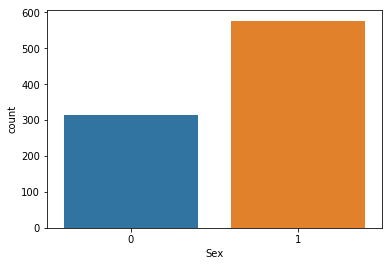

In [23]:
sns.countplot(df.Sex,label="count")
plt.show()

In [24]:
#get a count of the number survived or not
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

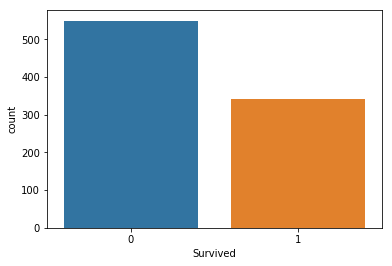

In [25]:
#visualize the count 
sns.countplot(df.Survived,label="count")
plt.show()

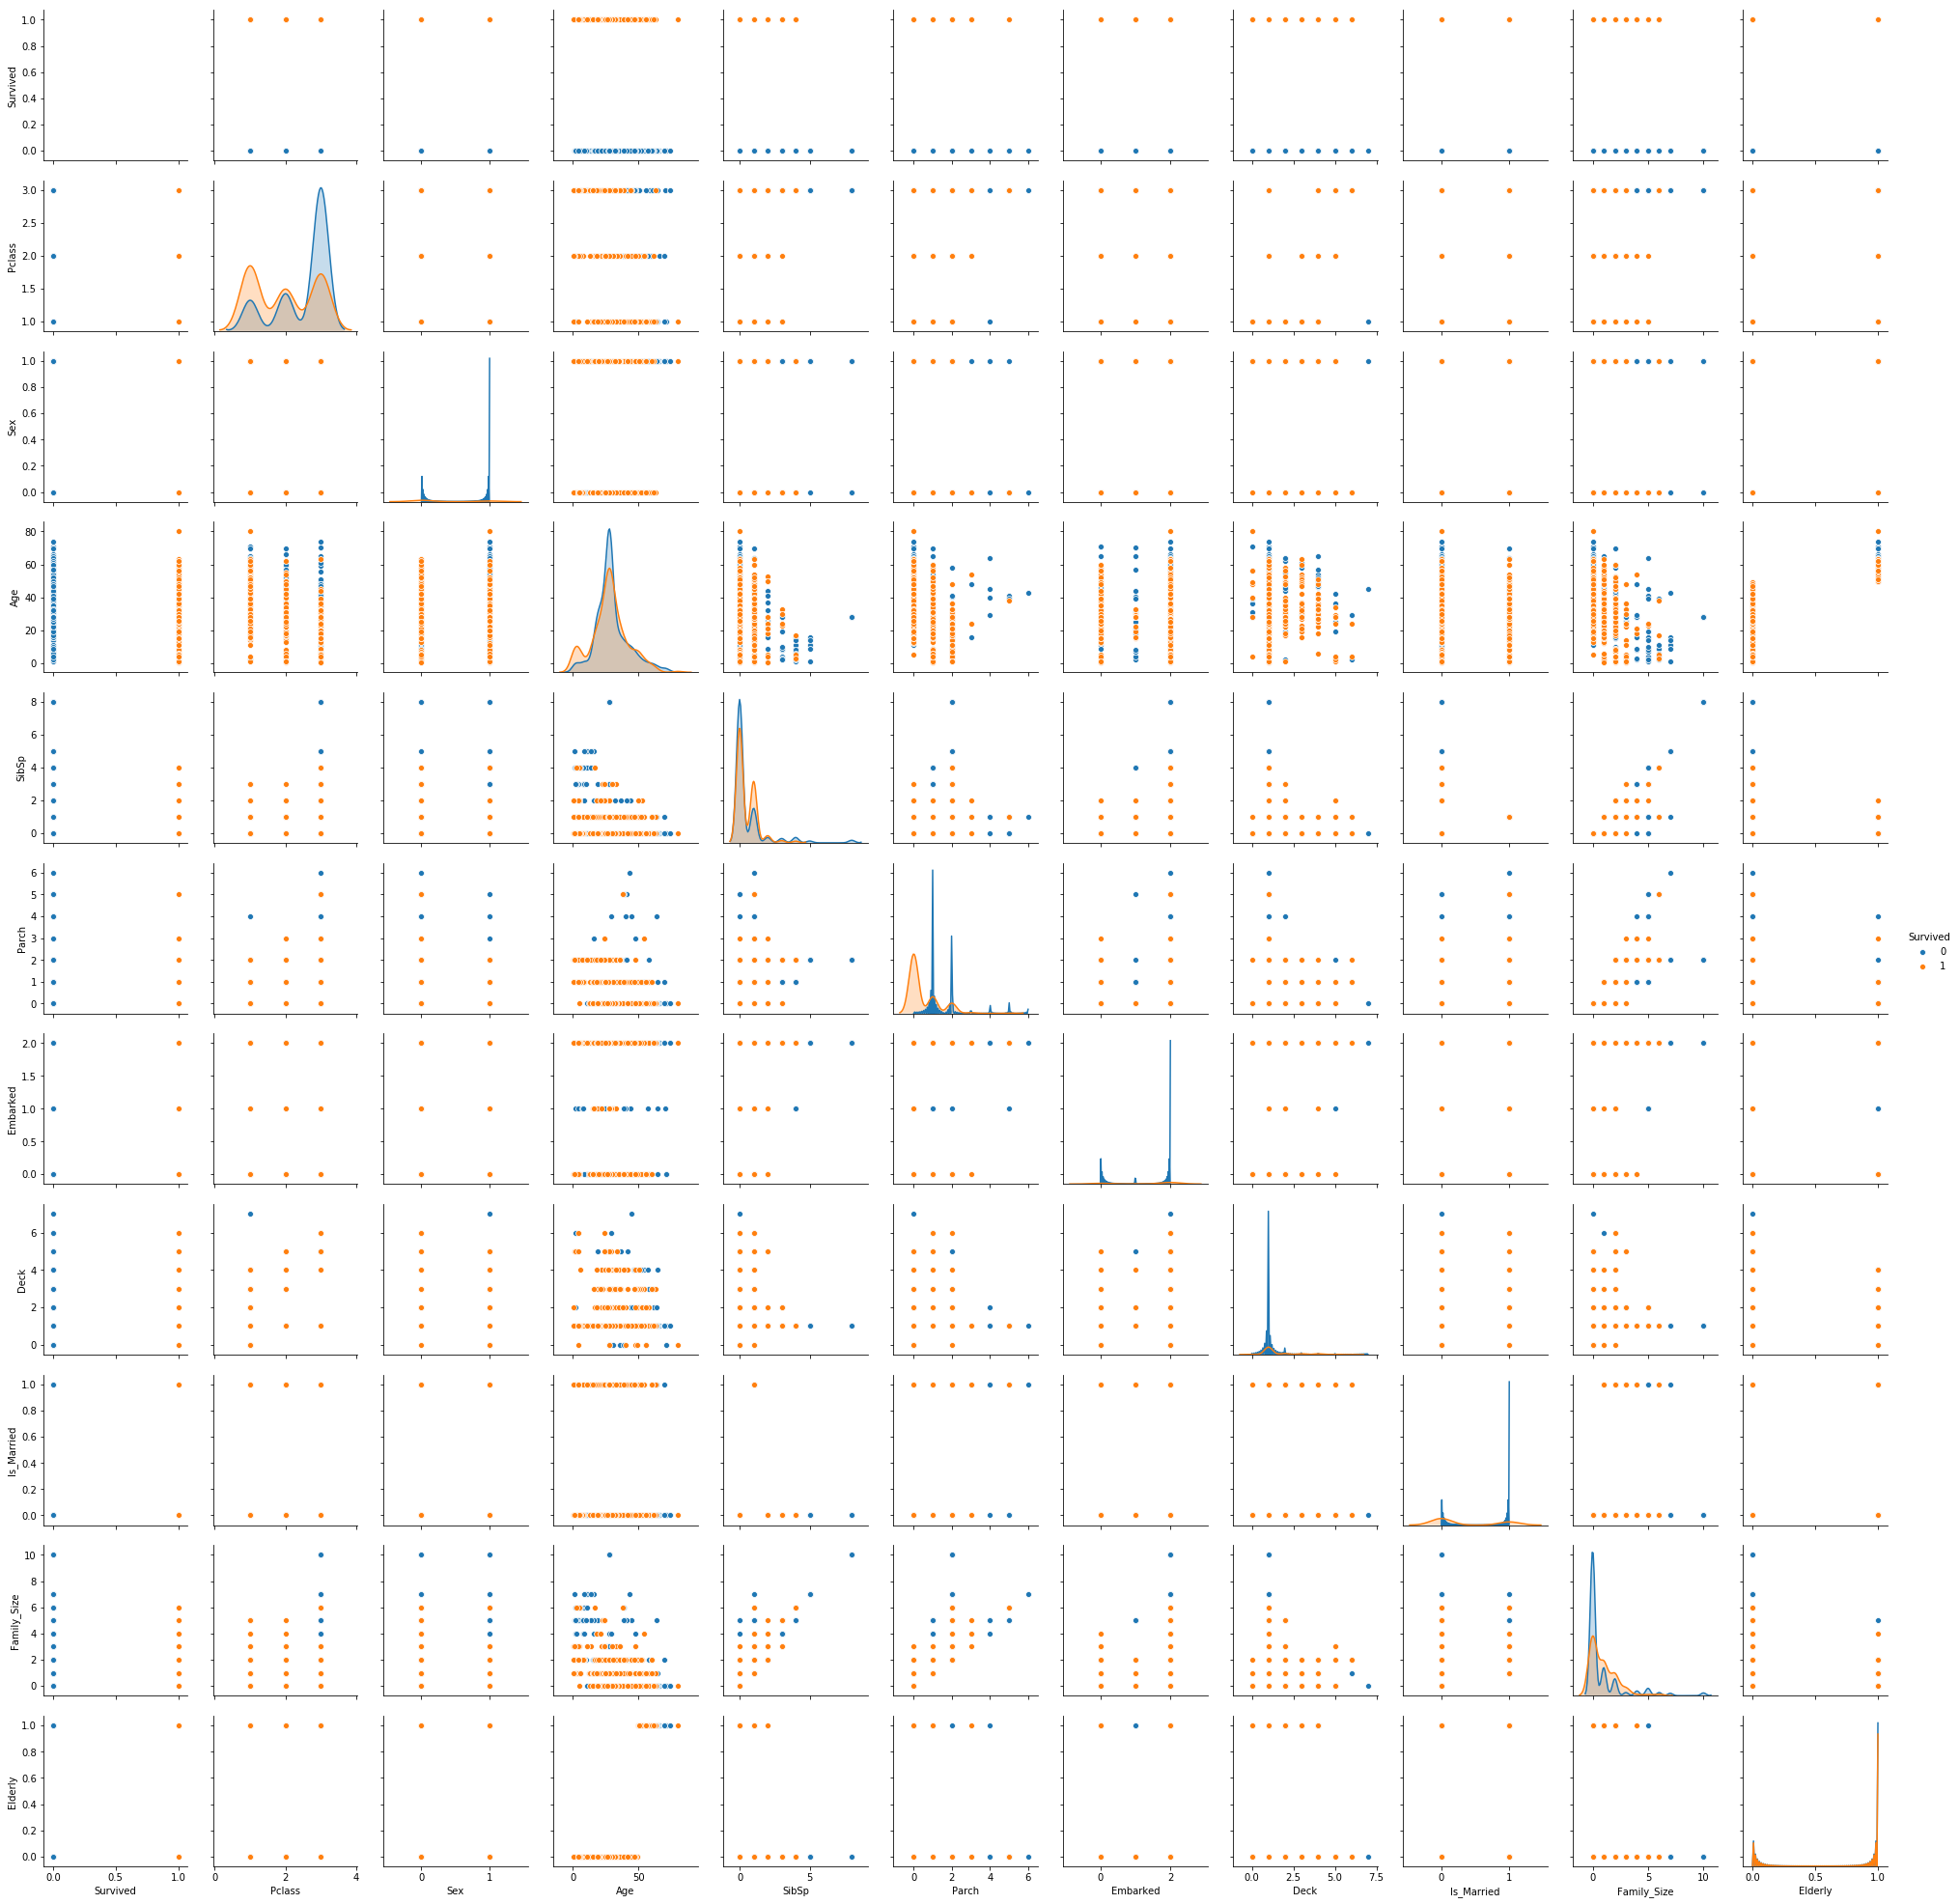

In [26]:
#create a pair plot
sns.pairplot(df.iloc[:,1:12],hue="Survived")
plt.show()

In [27]:
#get the correlation of the columns
df.iloc[:,1:12].corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Deck,Is_Married,Family_Size,Elderly
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.167675,0.209106,0.173076,0.016639,-0.011742
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.162098,-0.325042,-0.166435,0.065997,-0.271779
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.108262,-0.120336,-0.179339,-0.200988,0.034722
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.018754,0.084867,0.019918,-0.245619,0.651738
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.068230,-0.018383,0.239586,0.890712,-0.069015
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.039798,0.031375,0.188220,0.783111,-0.036540
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,1.000000,0.007189,-0.067380,0.066516,-0.024160
Deck,0.209106,-0.325042,-0.120336,0.084867,-0.018383,0.031375,0.007189,1.000000,0.105213,0.003110,0.072879
Is_Married,0.173076,-0.166435,-0.179339,0.019918,0.239586,0.188220,-0.067380,0.105213,1.000000,0.257780,-0.013034
Family_Size,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.066516,0.003110,0.257780,1.000000,-0.065424


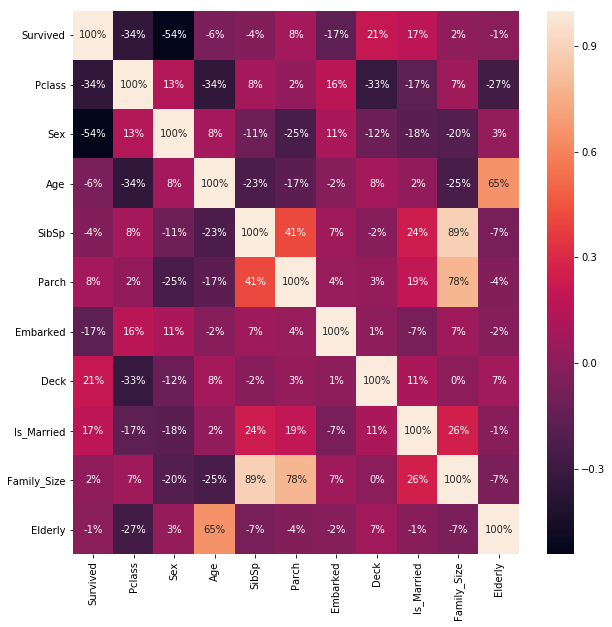

In [28]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True,fmt=".0%")
plt.show()

Test DATA


In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test['Is_Married'] = np.where(test['SibSp']==1, 1, 0)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Married
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [31]:
test["Family_Size"]=test.SibSp+test.Parch
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Married,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,2


In [32]:
test['Elderly'] = np.where(test['Age']>=50, 1, 0)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Married,Family_Size,Elderly
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,2,0


In [33]:
test.drop("Name",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)
test.drop("Fare",axis=1,inplace=True)

In [34]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Cabin          327
Embarked         0
Is_Married       0
Family_Size      0
Elderly          0
dtype: int64

In [35]:
test.Age=test.Age.transform(impute_median)

In [36]:
#fill the missing cabin values with mode
test["Cabin"].fillna(str(test["Cabin"].mode().values[0]),inplace=True)

In [37]:
test["Cabin"]=test["Cabin"].apply(lambda x:str(x).replace(' ','')if ' ' in str(x) else str(x))

In [38]:
test["Deck"] = test["Cabin"].str.slice(0,1)

In [39]:
test.drop(["Cabin"],axis=1,inplace=True)

In [40]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Is_Married       int64
Family_Size      int64
Elderly          int64
Deck            object
dtype: object

In [41]:
#encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelEncoder_Y=LabelEncoder()
test.iloc[:,2]=labelEncoder_Y.fit_transform(test.iloc[:,2].values)
test.iloc[:,6]=labelEncoder_Y.fit_transform(test.iloc[:,6].values)
test.iloc[:,10]=labelEncoder_Y.fit_transform(test.iloc[:,10].values)


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Is_Married,Family_Size,Elderly,Deck
0,892,3,1,34.5,0,0,1,0,0,0,1
1,893,3,0,47.0,1,0,2,1,1,0,1
2,894,2,1,62.0,0,0,1,0,0,1,1
3,895,3,1,27.0,0,0,2,0,0,0,1
4,896,3,0,22.0,1,1,2,1,2,0,1


In [43]:
#Split the data set into independent(x) and dependent (y) data sets
x=df.iloc[:,2:12].values
y=df.iloc[:,1].values.reshape(-1,1)
x_test  = test.drop("PassengerId",axis=1).copy()

In [44]:
#0.469
#split the data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.469,random_state=42)

In [45]:
#scale the data(feature scaling)
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [46]:
x_train.shape

(473, 10)

In [47]:
x_test.shape

(418, 10)

In [48]:
y_train.shape

(473, 1)

In [49]:
y_test.shape

(418, 1)

In [50]:
#create a function for the models
def models(x_train,y_train):
  #Logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=42)
  log.fit(x_train,y_train)
  
  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)
  
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=15,criterion="entropy",random_state=0)
  forest.fit(x_train,y_train)

  #Print the models accuracy on the training data
  print("[0]Logistic Regression Training Accuracy:",log.score(x_train,y_train))
  print("[1]Decision Tree Classifier Training Accuracy:",tree.score(x_train,y_train))
  print("[2]Random Forest Classifier Training Accuracy:",forest.score(x_train,y_train))
  
  return log,tree,forest

In [51]:
#Getting all of the models
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.7991543340380549
[1]Decision Tree Classifier Training Accuracy: 0.9577167019027484
[2]Random Forest Classifier Training Accuracy: 0.945031712473573


In [52]:
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix


for i in range(len(model)):
  print("Model ", i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))

  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]

  print(cm)
  print("Testing Accuracy = ", (TP+TN) / (TP+TN+FN+FP))
  print()

Model  0
[[219  29]
 [ 51 119]]
Testing Accuracy =  0.8086124401913876

Model  1
[[165  83]
 [ 40 130]]
Testing Accuracy =  0.7057416267942583

Model  2
[[190  58]
 [ 47 123]]
Testing Accuracy =  0.7488038277511961



In [53]:
#show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model) ):
  print("Model ",i)
  print( classification_report(y_test,model[i].predict(x_test)))
  print( accuracy_score(y_test,model[i].predict(x_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       248
           1       0.80      0.70      0.75       170

    accuracy                           0.81       418
   macro avg       0.81      0.79      0.80       418
weighted avg       0.81      0.81      0.81       418

0.8086124401913876

Model  1
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       248
           1       0.61      0.76      0.68       170

    accuracy                           0.71       418
   macro avg       0.71      0.72      0.70       418
weighted avg       0.73      0.71      0.71       418

0.7057416267942583

Model  2
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       248
           1       0.68      0.72      0.70       170

    accuracy                           0.75       418
   macro avg       0.74      0.74      0.74       418
weighte

In [54]:
pred=model[0].predict(x_test)
print(pred)


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 0 1 0 0 0 1 1 0 1 1 0]


In [55]:
PassengerId = test['PassengerId']
submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': pred })
submission.to_csv(r'submission.csv',index=False)

In [56]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv

<a href="./submission.csv"> Download File </a>